# FMA: A Dataset For Music Analysis

Kirell Benzi, Michaël Defferrard, Pierre Vandergheynst, Xavier Bresson, EPFL LTS2.

## Analysis

In [1]:
%matplotlib inline

import utils
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
df = pd.read_json(os.path.join('..', 'fma_small', 'fma_small.json'))
#df = pd.read_json(os.path.join('..', 'fma_medium.json'))
#df = pd.read_json(os.path.join('..', 'fma_large.json'))

## 1 Genres

Analysis
* Genre hierarchy
* Top- and sub-genres

Todo
* First plateau should be flat, no cross-over top genres

Observations
* Genres appearing most are the ones selected in the dataset.
* Most songs only have one genre.

In [3]:
enc = MultiLabelBinarizer()
genres_indicator = enc.fit_transform(df['genres'])
genres_names = enc.classes_
cross_correlation = genres_indicator.T @ genres_indicator

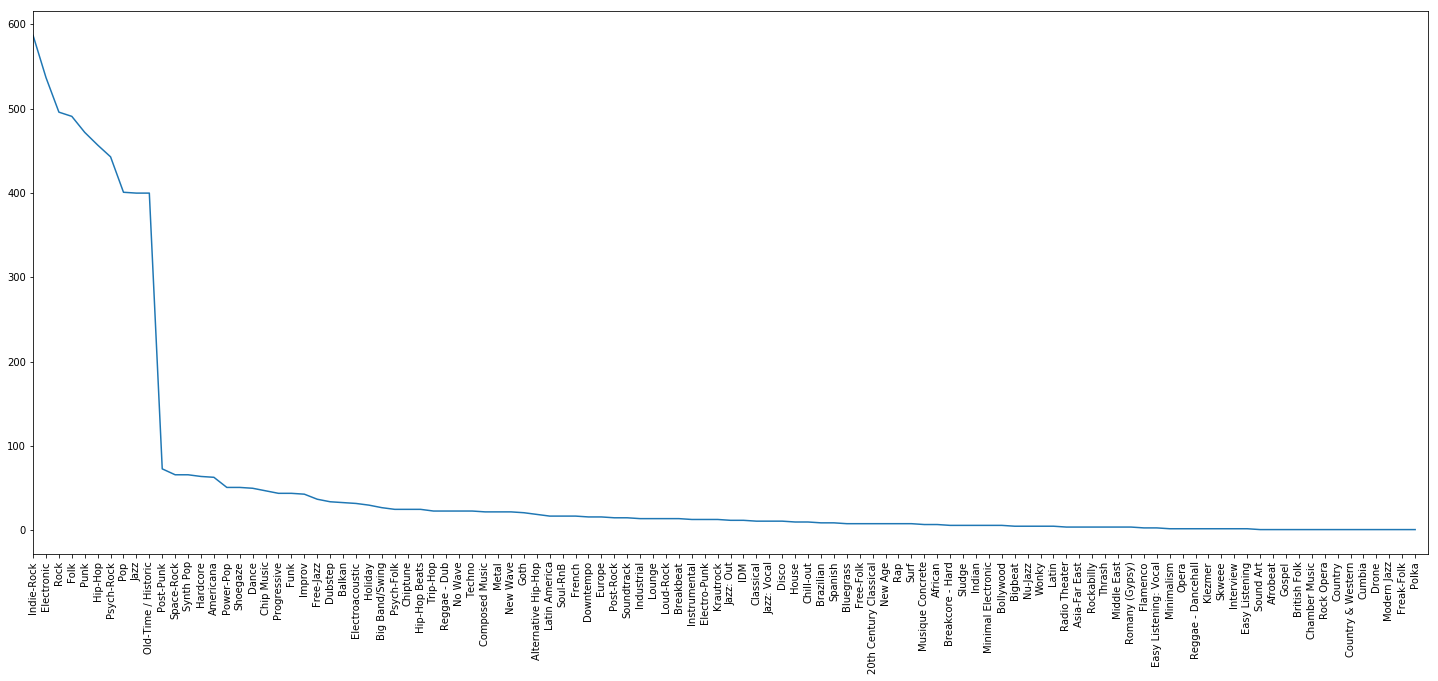

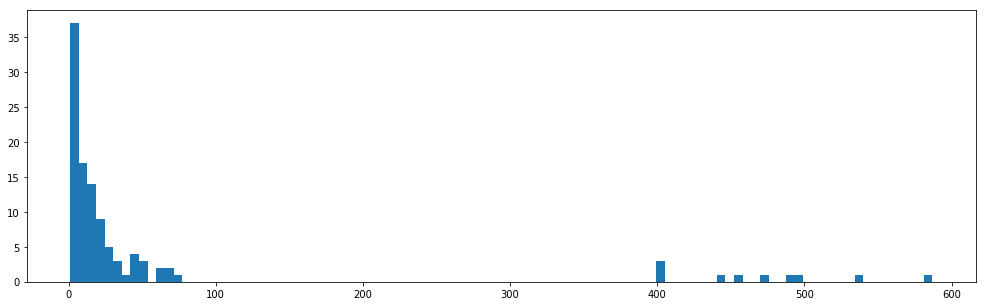

In [4]:
genres_count = cross_correlation.diagonal()
sort = np.argsort(genres_count)[::-1]
genres_count = genres_count[sort]

plt.figure(figsize=(25, 10))
plt.plot(genres_count)
plt.xticks(range(len(genres_names)), genres_names[sort], rotation=90);
plt.xlim((0, len(genres_names)))

plt.figure(figsize=(17, 5))
plt.hist(genres_count, bins=100);

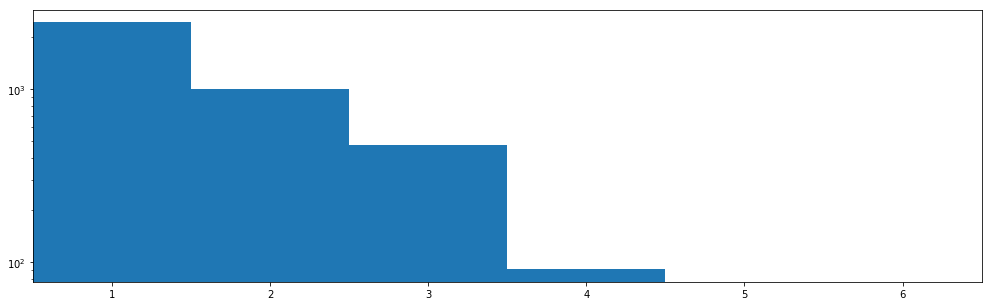

In [5]:
plt.figure(figsize=(17, 5))
tmp = genres_indicator.sum(axis=1)
plt.hist(tmp, bins=range(0, tmp.max()))
plt.yscale('log')
plt.xlim((1, tmp.max()+1))
plt.xticks(np.arange(tmp.max())+1.5, np.arange(tmp.max())+1);

/home/ubuntu/.pyenv/versions/3.6.0/envs/fma/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


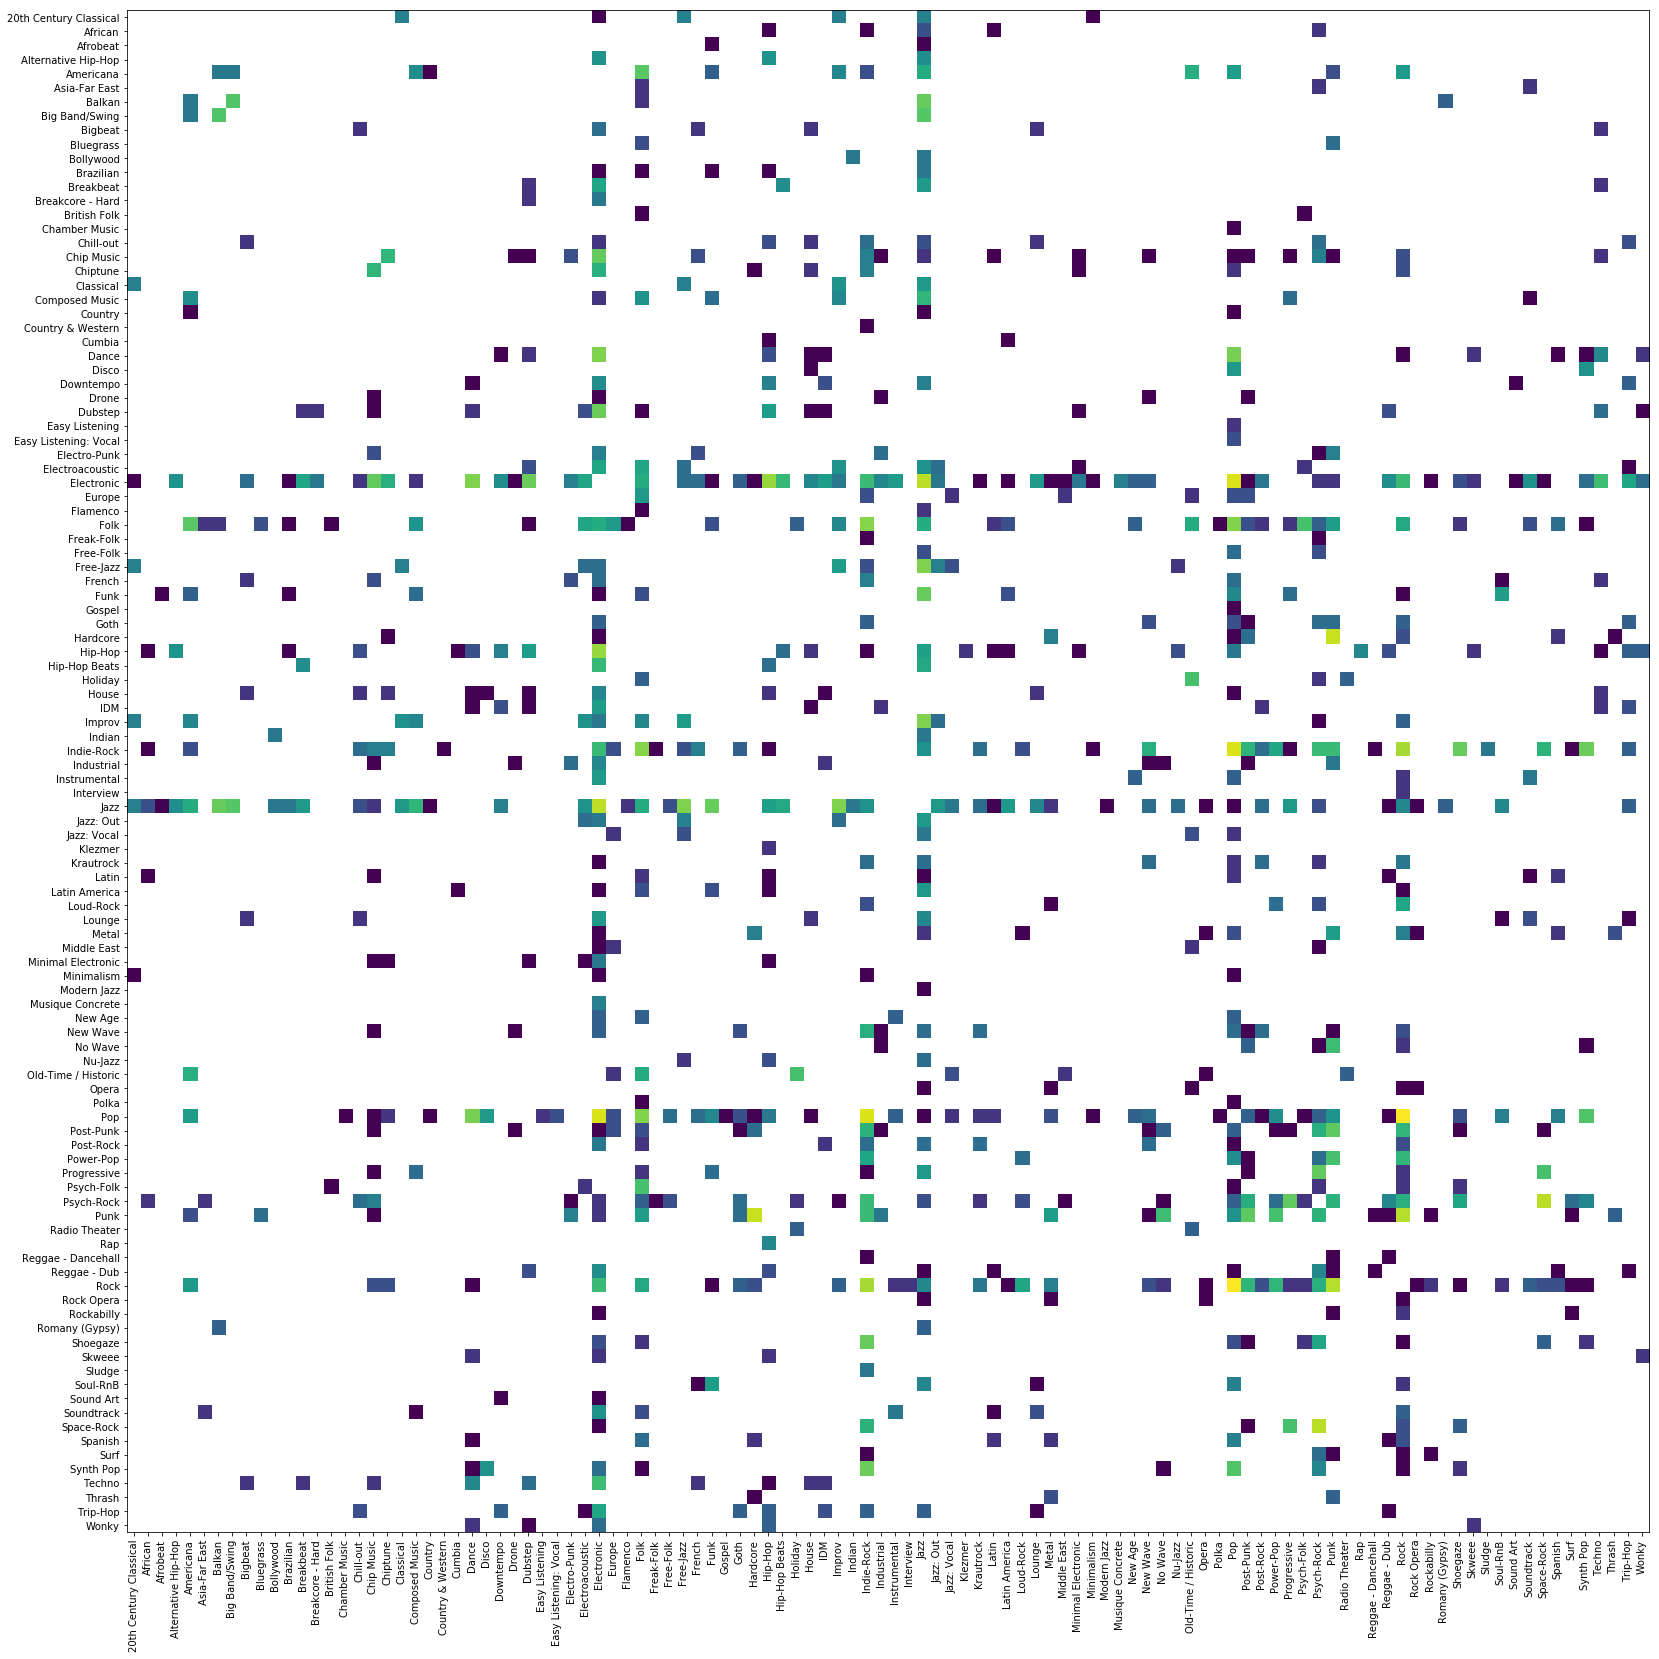

In [6]:
np.fill_diagonal(cross_correlation, 0)

plt.figure(figsize=(28, 28))
plt.imshow(np.log(cross_correlation))
plt.yticks(range(len(genres_names)), genres_names);
plt.xticks(range(len(genres_names)), genres_names, rotation=90);

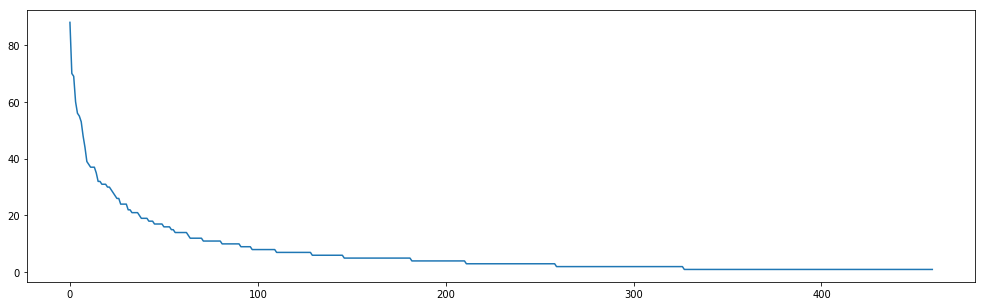

In [7]:
cross_correlation = np.tril(cross_correlation, k=-1)
sort = np.argsort(cross_correlation.flatten())
tmp = cross_correlation.flatten()[sort]

plt.figure(figsize=(17, 5))
plt.plot(tmp[tmp>0][::-1]);

In [8]:
N = 20
indices = np.unravel_index(sort[:-N:-1], cross_correlation.shape)
for i, j in zip(*indices):
    print('{}: {} | {}'.format(cross_correlation[i, j], genres_names[i], genres_names[j]))

88: Rock | Pop
70: Pop | Indie-Rock
69: Pop | Electronic
60: Punk | Hardcore
56: Jazz | Electronic
55: Space-Rock | Psych-Rock
53: Rock | Punk
48: Rock | Indie-Rock
44: Hip-Hop | Electronic
39: Indie-Rock | Folk
38: Pop | Folk
37: Jazz | Improv
37: Electronic | Dance
37: Jazz | Free-Jazz
35: Pop | Dance
32: Electronic | Dubstep
32: Synth Pop | Indie-Rock
31: Jazz | Balkan
31: Shoegaze | Indie-Rock


## 2 Artists

## 3 Music

e.g. audio features (echonest / librosa) to show diversity